# STAT207 Final Project - Age vs. Offensive Performance

Rohan Bindu

Vahey Mouradian

Sabir Rahman

## 1. Introduction

**Motivation:** As avid basketball fans, we wanted to investigate whether an individual offensive performance has any correlation with the age of the NBA player. In this dataset, we have over twenty columns of data about offensive statistics that enable us to analyze how important age is to a player’s success. Based on statistics such as points per game, rebounds per game, assists per game, and field goal percentages, we are able to identify how beneficial or detrimental age could be to a player’s success. 

Another way to explore this dataset would be to analyze whether the offensive performance of a team affects their chances of making the playoffs. We can confidently determine how important a team's offense is by using the same statistics as above and compare them to whether they made the playoffs or not.

**Research Questions:**

**Descriptive Analytics Research Question Set**

3 variables:

X = Age

Y = Points

Z = Games Played

Research Question: 

What is the relationship between x and y in this dataset?
How does the relationship between x and y change for different values of z?

The research question which we plan to answer using this dataset is the relationship between age and points per game. We are interested in answering this research question because we wanted to understand why team’s extend player’s contracts for multiple years despite their age. We plan to answer this research question by grouping each individual player by age and analyzing the steady incline or decline in points per game. The answers to these research questions could be used in today’s NBA and can help a team's front office determine contract extensions for players as they analyze the relationship between points per game and age.
    
The second research question which we plan to answer is how the relationship between age and points changes for different values of games played. We believed that games played could greatly affect the points per game as it gives the player’s more rest or less rest depending on the games played statistic. We plan to answer this question by grouping each individual player by age and using rounded averages to determine how much rest affects points per game. Just as the question before, we believe the answers to this question could also be used in today’s NBA to determine contract extensions for players and help team’s manage load management (Load management is when a player takes rest in between games to preserve the body and heal any injuries) for individual players. 

**Inference Research Question Set**

2 variables:

X = Team Qualified for Playoff or Not

Y = Age

**Research Question:**

Is there sufficient evidence to suggest that there is an association between x and y in “larger population"?

The research question which we plan to answer is if there is sufficient evidence to suggest that there is an association between age and a team making a playoff appearance. We plan to use the age and playoff (yes/no) columns to answer this question. We will group all the individual players by team and calculate the average age per team. After getting the average, we will analyze how this metric affects a team’s playoff chances. We are interested in answering this question because we want to understand how important experience and maturity is in the professional basketball world and if talent and pure athleticism can carry team’s to a championship. The answers to this research question can be used by helping professional team’s weigh the pros and cons of signing young rookies, or old and advanced veterans.

**Linear Regression Research Question Set**


Variables:

Numerical Response Variable(NRV) = Points per Game

W = Age

X = Games Played

Y = Field Goals per Game

Z = Minutes Played

**Research Questions:**

Is there a linear relationship between the NRV and the explanatory variables in the sample?

Is there sufficient evidence to suggest that there is a linear relationship between the NRV and explanatory variables in (population)?
	
The research question that we will answer in this section is whether there is a linear relationship between points per game and age,games played,minutes played, and field goals per game in the sample. The second research question we will answer Is if there is sufficient evidence to suggest that there is a linear relationship between points per game and age,games played,minutes played, and field goals per game in the NBA population. We plan to answer these research questions by using linear regression and testing the explanatory variables on the response variables. We are interested in answering this question because out of all the explanatory variables we believe that these 4 are the greatest influencers on a player’s offensive performance. These answers could help NBA coaches understand how minutes per game, games started, and field goals truly affect an individual's performance. 

**Logistic Regression Research Question Set**

Variables:

Categorical Response Variable(CRV) = Team Made Playoffs

W = Points per Game

X = Games Played

Y = Minutes played

Z = Age

**Research Questions:**

What explanatory variables should we include in the model that predicts the CRV to build a (regression) model?

Is their a linear relationship between the log-odds of the success of the CRV and explanatory variables in the (population)?

The research question that we will answer in this section is if the explanatory variables (points per game, games played, minutes played, and age) predict this response variable (team made playoffs or not) to build a parsimonious model. The second research question that we will answer is if there is a linear relationship between the log-odds of the success level of an individual making playoffs and points per game, games played, minutes played, and age in the NBA population. We plan to answer these questions by using logistic regression. We would be interested in answering this question because we want to understand how important age and offensive performance is for making the NBA playoffs. We believe that these answers could help professional teams understand the age factor and build their teams based on veteran experience. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import norm


Above are all of the imports needed to perform a proper analysis of the data that we collected from Kaggle, which is located below in it's raw form.

In [6]:
nba = pd.read_csv("2021-2022 NBA Player Stats - Playoffs.csv", encoding="utf-8", delimiter=";")
nba

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 11000: invalid continuation byte

In [62]:
nba_p = pd.read_csv("2021-2022 NBA Player Stats - Playoffs.csv", encoding="utf-8", delimiter=";")

In [63]:
nba = nba.drop_duplicates(subset="Player",keep="last")
nba

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


The first step in our process is to load the playoff dataframe in as well to get the list of teams that made the playoffs. This way we can create a yes/no column for players in the orignal dataset that made the playoffs. We also decided to get rid of the beginning of the season stats for players that were traded mid season because their more recent performances are more pressing to whether or not their teams made the playoffs. We also did not want duplicate names showing up in later parts of the report.

In [64]:
teams = pd.unique(nba_p["Tm"])
teams


array(['TOR', 'MEM', 'MIA', 'UTA', 'MIL', 'NOP', 'PHO', 'DEN', 'PHI',
       'MIN', 'DAL', 'GSW', 'ATL', 'CHI', 'BRK', 'BOS'], dtype=object)

In [65]:
nba["Playoffs"] = "No"
for index, row in nba.iterrows():
    if nba["Tm"][index] in teams:
        nba["Playoffs"][index] = "Yes"
            

C:\Users\vahey\AppData\Local\Temp\ipykernel_7580\1326793594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba["Playoffs"] = "No"
C:\Users\vahey\AppData\Local\Temp\ipykernel_7580\1326793594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba["Playoffs"][index] = "Yes"


This was followed by the actual sorting of players who did make or did not make playoffs using a simple for loop and a list of target team names above. You will notice the output size for "Yes" players is 317, whereas the playoff dataset has 217 players. This is because of players getting dropped before the end of the season and the beginning of the playoffs, but our analysis will be entirely based off of the regular season data.

In [66]:
nba[nba["Playoffs"] == "Yes"]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Playoffs
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,Yes
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,Yes
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,Yes
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,Yes
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,598,McKinley Wright IV,PG,23,MIN,5,0,3.8,0.4,0.6,...,0.0,0.0,0.0,0.6,0.0,0.0,0.2,0.2,1.0,Yes
803,599,Moses Wright,PF,23,DAL,3,0,4.3,0.3,1.3,...,0.3,0.7,1.0,0.3,0.0,0.3,0.0,0.0,1.7,Yes
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,Yes
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,Yes


## 2. Descriptive Analytics

The research question that we will answer in this section is the relationship between player’s age and their respective points per game in the 2021-2022 season.  The three variables that we chose were points per game, age, and games played as we believe these variables will give us a better understanding as to how age and rest impacts an individual’s offensive performance.

First, we need to average all of the players' statistics by age.

In [67]:
nba_age = nba.groupby("Age").agg("mean").reset_index()
nba_age["G"] = round(nba_age["G"])
nba_age = round(nba_age, 3)
nba_age

,Age,Rk,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,19,363.182,43.0,17.000,17.209,2.582,6.018,0.479,0.736,2.355,...,0.646,0.791,2.264,3.064,1.855,0.500,0.445,1.245,1.427,6.982
1,20,304.897,47.0,24.862,18.997,3.183,7.238,0.422,0.783,2.466,...,0.675,0.928,2.552,3.479,1.900,0.638,0.421,1.269,1.621,8.393
2,21,292.167,44.0,16.952,18.412,2.779,6.205,0.458,0.902,2.629,...,0.672,0.733,2.443,3.176,1.645,0.571,0.388,0.902,1.660,7.595
3,22,298.356,38.0,15.746,16.785,2.895,6.346,0.429,0.814,2.386,...,0.665,0.851,2.298,3.146,1.578,0.502,0.334,0.924,1.414,7.842
4,23,328.446,42.0,19.662,19.451,3.178,6.992,0.425,0.915,2.737,...,0.701,0.851,2.632,3.475,1.697,0.692,0.411,1.006,1.678,8.548
5,24,313.507,28.0,11.413,14.607,2.232,4.889,0.395,0.612,1.885,...,0.566,0.685,1.993,2.679,1.248,0.491,0.309,0.715,1.319,5.953
6,25,312.269,37.0,17.942,19.394,3.133,6.925,0.450,0.990,2.892,...,0.683,0.821,2.644,3.465,2.017,0.656,0.292,0.942,1.619,8.490
7,26,297.104,39.0,22.812,18.723,3.252,7.012,0.431,0.994,2.815,...,0.643,0.927,2.819,3.742,1.808,0.575,0.375,1.033,1.508,8.831
8,27,340.628,34.0,19.628,19.374,3.000,6.816,0.381,0.858,2.486,...,0.567,0.795,2.828,3.623,2.105,0.647,0.340,1.053,1.660,8.340
9,28,299.971,34.0,17.657,19.469,3.043,6.406,0.449,0.874,2.466,...,0.633,0.917,2.634,3.546,1.769,0.663,0.449,1.006,1.806,8.283


Below is a scatterplot with a best fit line displaying the relationship between Age and Points per game.

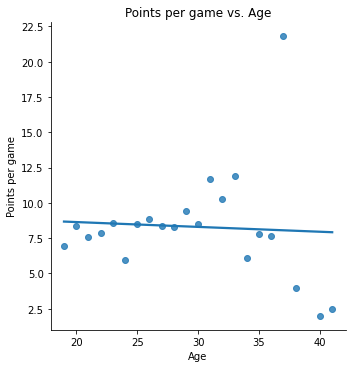

In [68]:
sns.lmplot(x="Age", y="PTS", ci=False, data=nba_age)
plt.title("Points per game vs. Age")
plt.ylabel("Points per game")
plt.show()

In order to find the equation of the best fit line, we need to run a simple linear regression on the data.

In [69]:
line = smf.ols("PTS~Age", data=nba_age).fit()
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.046
Method:                 Least Squares   F-statistic:                   0.06889
Date:                Tue, 06 Dec 2022   Prob (F-statistic):              0.796
Time:                        19:20:29   Log-Likelihood:                -60.559
No. Observations:                  22   AIC:                             125.1
Df Residuals:                      20   BIC:                             127.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3301      3.960      2.356      0.029       1.070      17.590
Age           -0.0343      0.131     -0.262      0.796      -0.307       0.238
==============================================================================
Omnibus:                       23.264   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.554
Skew:                           1.853   Prob(JB):                     2.58e-09
Kurtosis:                       8.424   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see an R-squared value of .004, which equals a correlation of .063 when taking the square root. The plot itself trends upwards until a player is in their early 30's, but then repidly declines as they near their late 30's. Most points are within a reasonable distance of each other, except for players aged 37. This datapoint was our only outlier and was skewed by the best player in the league, Lebron James. The intercept for the best fit line was 9.3301, with a slope of -0.0343.

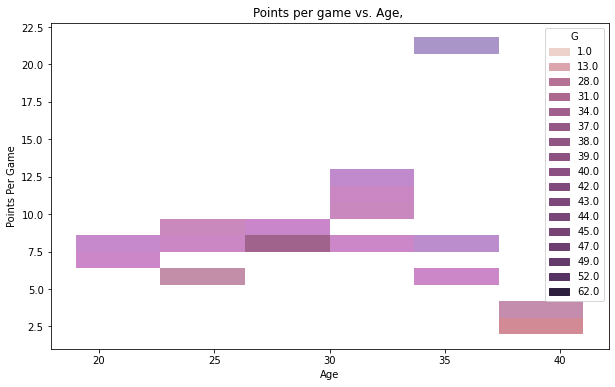

In [70]:
plt.figure(figsize=(10,6))
sns.histplot(x="Age", y="PTS", hue="G", data=nba_age)
plt.title("Points per game vs. Age, ")
plt.ylabel("Points Per Game")
plt.show()

Above is a histrogram that measures Points per game vs. Age and is colored by games played. Once again our only outlier was LeBron James at the age of 37. The means and standard deviations of all 3 variables are displayed below in their respective code output boxes. The staggering part is the standard deviation, demonstrating a very high variance which is seen in the histogram above. While this is normally a cause for concern, when dealing with sports data this is a very common occurance as there are many factors that affect performances. One thing that is very concrete about the visualization is that games played most defintely decreases as age increases, which can be seen by the boxes getting lighter in shade as players reach their late 30's. Most players peak in games played in their mid to late 20's, which is seen by the dark shaded boxes. This could hint at a possible association between age and peroformance, but there needs to be more in depth analysis which will be done later in the report.

In [71]:
means = nba[["PTS", "Age", "G"]].mean()
means

PTS     8.315207
Age    25.748760
G      39.090909
dtype: float64

In [72]:
std = nba[["PTS", "Age", "G"]].std()
std

PTS     6.406001
Age     4.123068
G      26.581936
dtype: float64

Conclusion: As stated earlier, there is a hint of an association with age and the points per game that a player will score. This is mainly shown by our scatterplot and histogram above. While visual evidence can be very appealing, it is also necessary to run tests on inference and various linear models to get a better theoretical understanding of what is going on with the data. By combining all 4 parts of our analysis, we should be able to come up with a solid understanding of how age and offensive performance are related. The next portion to go over will be inference.

## 3. Inference

The research question that we will answer in this section is if there is sufficient evidence to suggest that there is an association between age and a team making a playoff appearance or not and will relate this to the professional basketball world (Population). We believe that the team’s age and experience could have a possibility of affecting their playoffs chances. The hypothesis test that we will use is the difference in means of age, with the two levels being yes and no for playoffs. Our response variable will be whether or not the team makes the playoffs and our explanatory variable will be the team’s average age. 

Ho: Age(Playoffs) - Age(No Playoffs) = 0

Ha: Age(Playoffs) - Age(No Playoffs) $\neq$ 0

CLT conditions:

The data is normal because it is randomly selected from the population of the NBA players that made ployffs.

31 > 30.

31 < 10% of the NBA population size.

All conditions are met for population 1.

The data is normal because it is randomly selected from the population of the NBA players that didn't make ployffs.

28 is not greater than 30, but the distribution of the sample is approcimately normal.

28 < 10% of the NBA population size.

All conditions are met for population 2.

Observations in samples 1 and 2 are independent between the samples.

In [73]:

nbay_sample = nba[nba["Playoffs"] == "Yes"].sample(31, random_state=100)
nban_sample = nba[nba["Playoffs"] == "No"].sample(28, random_state=100)


Above we have taken two random samples of the nba dataset; one of the datasets was whether a team made the playoffs, and another dataset was whether a team didn't make the playoffs.

In [74]:
nbays_mean = nbay_sample["Age"].mean()
nbays_std = nbay_sample["Age"].std()
print((nbays_mean, nbays_std))

(26.580645161290324, 4.780336065929446)


Above, we are taking the mean and standard deviation of the age from our nba "yes to playoffs" sample dataset.

In [75]:
nbans_mean = nban_sample["Age"].mean()
nbans_std = nban_sample["Age"].std()
print((nbans_mean, nbans_std))

(24.321428571428573, 3.4539678892390095)


Above, we are taking the mean and standard deviation of the age from our nba "no to playoffs" sample dataset.

In [76]:
se = np.sqrt((nbays_std**2 / 317) + (nbans_std**2/ 288))
se

0.3369129718939704

Above, we are taking the standard error so we can use it to calculate the p-value.

In [77]:
test_statistic = (nbays_mean - nbans_mean) / se
test_statistic

6.705638483319506

We use a z score, since we knew the population mean and standard deviation, and calulated the test-statistic.

In [78]:
pvalue = 2*(1-norm.cdf(np.abs(test_statistic)))
pvalue

2.0052848270779577e-11

This is the p-value that we came up with after we calculated our test statistic. As we can see, it is 0.

Conclusion : 

Since our p-value was 0, we will reject the null hypothesis. There is sufficient evidence to suggest the alternative hypothesis that there is an association between age and a team making a playoff appearance or not in the professional basketball world. This also reaffirms our research question on offensive performance, as playoff teams generally have better offensive performance than non-playoff teams.

## 4. Linear Regression

The research question that we will answer in this section is whether there is a linear relationship between points per game and age, games played, minutes played, and field goals per game in the sample. The second research question we will answer is if there is sufficient evidence to suggest that there is a linear relationship between points per game and age, games played, minutes played, and field goals per game in the NBA population. We chose these 4 explanatory variables as our numerical response variables because we believe that these variables have the greatest effect on an individual player's offensive performance. We chose points per game as our numerical response variable because we believe that this is the most accurate metric to determine offensive performance. This model was generated using our sample of players that made the playoffs.

**Summary Output for Linear Regression**

In [79]:
model = smf.ols("PTS~Age+G+MP+FG", data=nbay_sample).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     382.0
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           1.11e-22
Time:                        19:20:31   Log-Likelihood:                -36.439
No. Observations:                  31   AIC:                             82.88
Df Residuals:                      26   BIC:                             90.05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4782      1.036     -0.461      0.648      -2.608       1.652
Age            0.0106      0.035      0.300      0.767      -0.062       0.083
G              0.0098      0.011      0.880      0.387      -0.013       0.033
MP            -0.0407      0.046     -0.879      0.388      -0.136       0.055
FG             2.8970      0.157     18.400      0.000       2.573       3.221
==============================================================================
Omnibus:                        1.289   Durbin-Watson:                   2.258
Prob(Omnibus):                  0.525   Jarque-Bera (JB):                0.367
Skew:                          -0.036   Prob(JB):                        0.832
Kurtosis:                       3.528   Cond. No.                         438.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Linear Regression Equation**

Points per game^ = -0.4782 + 0.0106Age + 0.0098G - 0.0407MP + 2.8970FG

**Conditions Check for Multiple Linear Regression**



1. Linearity Condition: This condition passes because there are an equal amount of positive and negative residuals as we move left to right.

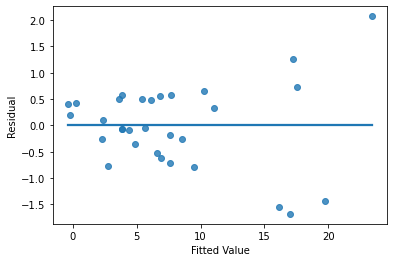

In [80]:
sns.regplot(x=model.fittedvalues, y=model.resid, ci=None)
plt.ylabel("Residual")
plt.xlabel("Fitted Value")
plt.show()

2. Constant Variability of residuals:
Because residual spread increases as we increase fitted values, this condition fails.

3. Normality of Residuals:
The residual historgram is slightly right skewed, therefore this condition fails.

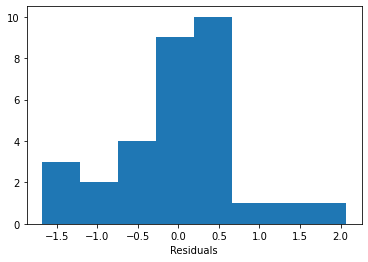

In [81]:
plt.hist(model.resid,bins=8)
plt.xlabel("Residuals")
plt.show()

4. Independence of residuals condition:
The sample was randomly selected from the population of NBA players that made the playoffs. 31 < 10% of all NBA playoff players. This condition passes.

5. No multicolinearity condition: Because there are multiple variables with a strong positive correlation, this condition fails.

In [82]:
nbay_sample[["Age", "MP", "G", "FG"]].corr()

,Age,MP,G,FG
Age,1.000000,-0.045848,-0.243087,-0.033134
MP,-0.045848,1.000000,0.816568,0.873726
G,-0.243087,0.816568,1.000000,0.620668
FG,-0.033134,0.873726,0.620668,1.000000


Due to no multicolinearity failing, we decided to drop field goals and reasses that condition.

In [83]:
nbay_sample[["Age", "MP", "G"]].corr()

,Age,MP,G
Age,1.000000,-0.045848,-0.243087
MP,-0.045848,1.000000,0.816568
G,-0.243087,0.816568,1.000000


Now we can see there is only one pair of variables that has a strong positive linear correlation. With this in mind, we should still proceed with caution when assessing our model.

**Methods Used to Assess the Fit of the Model**

Using our R-squared value of .983 and our linearity condition that passed, we can see that both indicate out model is a good fit even though the other linear conditions left us proceeding with caution.

**Non-Zero Slopes Check**

Now we will assess the significance of each of the variables using their p-values in relation to Points per game.

H0: Bi = 0 -> No linear association between Points per game and Age

HA: Bi != 0 -> linear association between Points per game and Age

p-value: 0.767

Not Statistically Significant

H0: Bi = 0 -> No linear association between Points per game and Games Played

HA: Bi != 0 -> linear association between Points per game and Games Played

p-value: 0.387

Not Statistically Significant

H0: Bi = 0 -> No linear association between Points per game and Minutes Played

HA: Bi != 0 -> linear association between Points per game and Minutes Played

p-value: 0.388

Not Statistically Significant

H0: Bi = 0 -> No linear association between Points per game and Field goals per game

HA: Bi != 0 -> linear association between Points per game and Field goals per game

p-value: 0.000

Statistically Significant



Above, we have checked the slopes for each of our explanatory variables that we decided to use to test this linear regression model.

**Conclusion**

In conclusion, according to 2d's results we have identified a linear relationship between points per game and age, minutes played, games played, and field goals per game in the sample. There is not sufficient evidence to suggest that there is a linear relationship between these predictors and points per game in the entire population. This is because Field goals per game highly skewed our linear fit, which was shown when we removed it and revalidated the condition for multicolinearity.

## 5. Logistic Regression

The research question that we will answer in this section is if the explanatory variables (points per game, games played, minutes played, and age) predict this response variable (team made playoffs or not) to build a parsimonious model. The second research question that we will answer is if there is a linear relationship between the log-odds of the success level of an individual making playoffs and points per game, games played, minutes played, and age in the NBA population. We chose to create a categorical response variable because we wanted to test and see how an individual’s player’s offensive performance and age affects his chances of making the playoffs. We chose these 4 explanatory variables because we believe that these variables are the most accurate metric to determine how offensive performance affects the NBA playoffs.

First, we have to load the train and test split model from sklearn, and turn the Yes and No variables from the playoff column into 1's and 0's so that the logistic regression can properly read the information.

In [84]:
from sklearn.model_selection import train_test_split
nba["y"] = nba["Playoffs"].map({"Yes":1, "No":0})

df_train, df_test = train_test_split(nba, test_size = 0.20, random_state =100)

C:\Users\vahey\AppData\Local\Temp\ipykernel_7580\3131664259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba["y"] = nba["Playoffs"].map({"Yes":1, "No":0})


Below we can see the outputs for both the training and testing samples.

In [85]:
df_train

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Playoffs,y
161,128,Ed Davis,C,32,CLE,31,3,6.5,0.4,0.5,...,1.6,2.1,0.2,0.1,0.3,0.2,1.1,0.9,No,0
178,141,Luka Don?i?,PG,22,DAL,65,65,35.4,9.9,21.6,...,8.3,9.1,8.7,1.2,0.6,4.5,2.2,28.4,Yes,1
13,10,Justin Anderson,SF,28,IND,13,6,20.7,2.5,6.7,...,2.8,3.1,2.1,0.5,0.5,0.5,1.4,6.8,No,0
405,300,DeAndre Jordan,C,33,PHI,16,1,13.4,2.0,3.4,...,3.8,5.8,0.5,0.1,0.6,1.0,1.3,4.6,Yes,1
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,579,Hassan Whiteside,C,32,UTA,65,8,17.9,3.3,5.1,...,5.0,7.6,0.4,0.3,1.6,0.8,2.8,8.2,Yes,1
65,54,Bogdan Bogdanovi?,SG,29,ATL,63,27,29.3,5.4,12.6,...,3.5,4.0,3.1,1.1,0.2,1.1,2.1,15.1,Yes,1
475,351,Caleb Martin,SF,26,MIA,60,12,22.9,3.5,6.8,...,2.7,3.8,1.1,1.0,0.5,0.9,1.7,9.2,Yes,1
99,80,Jalen Brunson,PG,25,DAL,79,61,31.9,6.4,12.8,...,3.4,3.9,4.8,0.8,0.0,1.6,1.9,16.3,Yes,1


In [86]:
df_test

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Playoffs,y
702,520,Isaiah Stewart,C,20,DET,71,71,25.6,3.5,6.9,...,5.5,8.7,1.2,0.3,1.1,1.2,3.0,8.3,No,0
200,156,Anthony Edwards,SG,20,MIN,72,72,34.3,7.6,17.3,...,3.9,4.8,3.8,1.5,0.6,2.6,2.3,21.3,Yes,1
199,155,Jaime Echenique,C,24,WAS,1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0
534,396,Emmanuel Mudiay,PG,25,SAC,2,0,5.5,0.0,1.0,...,0.0,0.0,2.0,0.5,0.0,0.5,0.5,1.5,No,0
531,393,Marcus Morris,PF,32,LAC,54,54,29.0,5.6,12.8,...,3.9,4.4,2.1,0.5,0.3,1.3,2.1,15.4,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,174,Evan Fournier,SG,29,NYK,80,80,29.5,5.0,12.1,...,2.2,2.6,2.1,1.0,0.3,1.3,2.3,14.1,No,0
649,488,Domantas Sabonis,PF,25,SAC,15,15,33.6,7.5,13.5,...,9.3,12.3,5.8,0.9,0.3,3.5,3.8,18.9,No,0
479,353,Kelan Martin,SF,26,BOS,3,0,2.0,0.0,1.0,...,0.3,0.7,0.0,0.0,0.0,0.0,0.0,0.0,Yes,1
83,70,Armoni Brooks,PG,23,TOR,13,3,11.8,0.8,2.9,...,1.1,1.7,1.0,0.5,0.2,0.3,1.1,2.6,Yes,1


**Backwards Elimination Algorithm**

In [87]:
current_mod = smf.logit('y~PTS+G+MP+Age', data=df_train).fit()
print("ITERATION 1: BIC of the Current Model", current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.651094
         Iterations 5
ITERATION 1: BIC of the Current Model 661.1698700369309


Test model that deletes Points Per Game.

In [88]:
# Test model that deletes PTS
test_mod = smf.logit('y~G+MP+Age', data=df_train).fit()
print("BIC of Test Model that Deletes PTS from the Current Model", test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.656213
         Iterations 5
BIC of Test Model that Deletes PTS from the Current Model 659.942477688111


Test model that deletes games played.

In [89]:
# Test model that deletes games played
test_mod = smf.logit('y~PTS+MP+Age', data=df_train).fit()
print("BIC of Test Model that Deletes Games Played from the Current Model", test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.669449
         Iterations 5
BIC of Test Model that Deletes Games Played from the Current Model 672.7550536067424


Test model that deletes minutes played.

In [90]:
# Test model that deletes Minutes Played
test_mod = smf.logit('y~PTS+G+Age', data=df_train).fit()
print("BIC of Test Model that Deletes Minutes Played from the Current Model", test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.669978
         Iterations 5
BIC of Test Model that Deletes Minutes Played from the Current Model 673.2669526303546


Test model that deletes Age.

In [91]:
# Test model that deletes Age
test_mod = smf.logit('y~PTS+G+MP', data=df_train).fit()
print("BIC of Test Model that Deletes Age from the Current Model", test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.670200
         Iterations 5
BIC of Test Model that Deletes Age from the Current Model 673.4822667050247


Because there was at least one "test model that has a BIC score (659.942477688111) that is lower than the BIC score of the current model (661.1698700369309), we continue on to step 4 in the algorithm.


The "test model" (from step 2) that had the lowest BIC score was the one that deleted the "PTS" explanatory variable from the "current model". So we set the new "current model" to be the test model that does not include "PTS" and we go back to step(2). We can call this a new iteration of the algorithm.

In [92]:
current_mod = smf.logit('y~G+MP+Age', data=df_train).fit()
print("ITERATION 2: BIC of the Current Model", current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.656213
         Iterations 5
ITERATION 2: BIC of the Current Model 659.942477688111


Test model that deletes games played.

In [93]:
# Test model that deletes games played
test_mod = smf.logit('y~MP+Age', data=df_train).fit()
print("BIC of Test Model that Deletes games played from the Current Model", test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.673869
         Iterations 5
BIC of Test Model that Deletes games played from the Current Model 670.8509846639396


Test model that deletes minutes played.

In [94]:
# Test model that deletes minutes played 
test_mod = smf.logit('y~G+Age', data=df_train).fit()
print("BIC of Test Model that Deletes minutes played from the Current Model", test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.676265
         Iterations 4
BIC of Test Model that Deletes minutes played from the Current Model 673.170940047089


Test model that deletes Age.

In [95]:
# Test model that deletes age
test_mod = smf.logit('y~G+MP', data=df_train).fit()
print("BIC of Test Model that Deletes age from the Current Model", test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.673399
         Iterations 4
BIC of Test Model that Deletes age from the Current Model 670.3969644241446


Because there were no "test models" that had a lower BIC score from the current model (659.942477688111) (with games played, minutes played, and age as explanatory variables) as our "final model".

**Final Parsimonious Logistic Regression Model and Summary Output**

In [96]:
final_mod = smf.logit('y~G+MP+Age', data=df_train).fit()
final_mod.summary()

Optimization terminated successfully.
         Current function value: 0.656213
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  484
Model:                          Logit   Df Residuals:                      480
Method:                           MLE   Df Model:                            3
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                 0.05131
Time:                        19:20:34   Log-Likelihood:                -317.61
converged:                       True   LL-Null:                       -334.78
Covariance Type:            nonrobust   LLR p-value:                 1.667e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0428      0.628     -3.252      0.001      -3.274      -0.812
G              0.0190      0.005      4.008      0.000       0.010       0.028
MP            -0.0548      0.013     -4.249      0.000      -0.080      -0.030
Age            0.0951      0.024      3.950      0.000       0.048       0.142
==============================================================================
"""

What this means is that the final result with just games played, minutes played, and age as explanatory variables is more parismonious than the model with points per game, games played, minutes played, and age, because this final model had a lower BIC score. However, we do not know for sure that the model with games played, minutes played, and age has the LOWEST BIC score out of all the possible 2^4 = 16 possible models combination that use (or do not use) the four possible explanatory variables that we originally considered!

**Logistic Regression Equation for Final Model**

ln(Playoffs) = -2.0428 + 0.0190G - 0.0548MP + 0.0951Age

After we wrote out our logistic regression equation for the final mode, we began the work to calculate the ROC and AUC of the test dataset.

In [97]:
phat_test = final_mod.predict(exog=df_test[["G", "MP", "Age"]])
phat_test.head(10)


702    0.451067
200    0.342092
199    0.523779
534    0.518076
531    0.607491
541    0.704874
525    0.537422
683    0.604077
123    0.621213
444    0.694337
dtype: float64

In [98]:
phat_test = final_mod.predict(exog=df_test)
phat_test.head(10)

702    0.451067
200    0.342092
199    0.523779
534    0.518076
531    0.607491
541    0.704874
525    0.537422
683    0.604077
123    0.621213
444    0.694337
dtype: float64

Below is the testing dataset with the respective phat values added for each player.

In [99]:
df_test["phat_test"] = phat_test
df_test

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Playoffs,y,phat_test
702,520,Isaiah Stewart,C,20,DET,71,71,25.6,3.5,6.9,...,8.7,1.2,0.3,1.1,1.2,3.0,8.3,No,0,0.451067
200,156,Anthony Edwards,SG,20,MIN,72,72,34.3,7.6,17.3,...,4.8,3.8,1.5,0.6,2.6,2.3,21.3,Yes,1,0.342092
199,155,Jaime Echenique,C,24,WAS,1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0,0.523779
534,396,Emmanuel Mudiay,PG,25,SAC,2,0,5.5,0.0,1.0,...,0.0,2.0,0.5,0.0,0.5,0.5,1.5,No,0,0.518076
531,393,Marcus Morris,PF,32,LAC,54,54,29.0,5.6,12.8,...,4.4,2.1,0.5,0.3,1.3,2.1,15.4,No,0,0.607491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,174,Evan Fournier,SG,29,NYK,80,80,29.5,5.0,12.1,...,2.6,2.1,1.0,0.3,1.3,2.3,14.1,No,0,0.649506
649,488,Domantas Sabonis,PF,25,SAC,15,15,33.6,7.5,13.5,...,12.3,5.8,0.9,0.3,3.5,3.8,18.9,No,0,0.227845
479,353,Kelan Martin,SF,26,BOS,3,0,2.0,0.0,1.0,...,0.7,0.0,0.0,0.0,0.0,0.0,0.0,Yes,1,0.593429
83,70,Armoni Brooks,PG,23,TOR,13,3,11.8,0.8,2.9,...,1.7,1.0,0.5,0.2,0.3,1.1,2.6,Yes,1,0.436711


Below, we calculated the ROC and AUC scores for the testing dataset.

In [100]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_pew, tpr_pew, score_pew = roc_curve(y_true=df_test['y'],y_score=df_test['phat_test'])
auc_pew = roc_auc_score(y_true=df_test['y'], y_score=df_test['phat_test'])

In [101]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = '+str(round(auc, 3))+')')
    plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

The ROC Curve is displayed below using matplotlib.

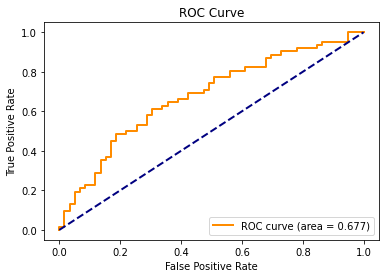

In [102]:
plot_roc(fpr_pew, tpr_pew, auc_pew)

The AUC for the test dataset is .677. We have calculated the ROC curve above. This gives us a sense of how good our logistic regression model(which has been trained with the training dataset) would be at predicting the probability of how much age and an indivual's offensive performance affects their chances of making the NBA playoffs. Because the AUC is not that high (closer to 0.5 than it is 1), this tells us there there does not exist some probability threshold that gets somewhat close to giving us the ideal scenario of a model with a false positive rate of 0 and a true positive rate of 1 with new data.

In [103]:
from sklearn.metrics import confusion_matrix

def tpr_fpr_tresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold': [thresh], 'tpr':[tpr], 'fpr':[fpr]})

Given our research goals, that there does not exist a predictive probability threshold that will give us an ideal combination. We decided to go with a higher true positive rate rather than a lower false positive rate. We chose to go with a number close to 0.5 as our threshold as this will give us results that guarantees a higher true positive than a lower false positive rate. As we tested around with the data we found that .46 gave us the best difference between true positive rate and false positive rate. 

In [104]:
tpr_fpr_tresh(df_test['y'], df_test['phat_test'], 0.46)

,threshold,tpr,fpr
0,0.46,0.806452,0.559322


The false positive rate is .559322 and the true positive rate is .806452.

**Linear Relationship?**

All three variables, games played, minutes played, and age are all statistically significant with p-values below 0.001. These were taken from our final parsiminious model displayed earlier. This indicates a linear relationship between the log-odds of making the playoffs and games played, minutes played, and age.

Conclusion: 

Our observed AUC value of .677 was quite far off from an ideal value closer to 1. This means that we will struggle to get close to a false positive rate of 0 and a true positive rate of 1. As stated earlier, our safest option was to go with a predictive probability threshold that gave us the highest true positive rate since we were bound to have a decent amount of false positive rate. Although our AUC value was low, the logistic regression model indicates a linear relationship between making the playoffs and games played, minutes played, and age. Once again, the final explanatory variables that were used were games played, minutes played, and age.

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes in their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 6. Conclusion

**Summary:**

Our motivation for this analysis was to find out how big of a factor age contributed in a player's success and the team's success overall. In our Descriptive Analytics section, the first thing we wanted to find out was the relationship between age and the number of points scored per game. We found that points went up with age until players hit their early thirties, which is where the average started to go down and the outlier we had was from LeBron James. We then checked how the relationship between age and points scored changed based on the amount of games played. We found that there were more points made with more games played, with LeBron James once more causing the outlier as he is an older who averages way more points per game than everyone else.

In our Inference Research section, the first thing we wanted to find out was if there is sufficient evidence to suggest that there is an association between age and a team making playoffs. We found that there was sufficient evidence to suggest that the alternative hypothesis is true and there is sufficient evidence to suggest that there is an association age and making playoffs within the population of the NBA. 

In our Linear Regression section, we wanted to find out if there is a linear relationship between points per game and age, games played, minutes played, and field goals per game from our sample of players that made playoffs. We found that there is a linear relationship because there was an equal amount of positive and negative residuals as we moved from left to right. We also wanted to find out if there was a linear relationship between points per game and age, games played, minutes played, and field goals per game from the whole population of NBA played. We found their isn't sufficient evidence to suggest this because the field goals per game highly skewed our linear fit, which was shown when we removed it and revalidated the condition for multicolinearity.

In our Logistic Regression section, we wanted to find out if the explanatory variables (points per game, games played, minutes played, and age) predict the response variable (team made playoffs or not) to build a parsimonious model. We found that we were able to predict this by building a parsimonious model using games played, minutes played, and age. We also wanted to find out if there is a linear relationship between the log-odds of the success level of an individual making playoffs and points per game, games played, minutes played, and age in the NBA population. We found that there was a linear relationship because the explanatory variables we used to make the parsimonious model all had p-values less than 0.001.

Overall, we were able to determine that age was a major factor that determined a player's success as well as a team's success. Older players were able to score more points up to the peak age and were making more points with the more games they played compared to younger players. We found there was an association between age and a team making playoffs and that there was a linear relationship between the age of players and the population of not only the people who made playoffs but the whole NBA population as well.

**Future Work:**

Some research questions or analyses that someone could conduct using this analyses is how important other offensive statistics such as rebounds, assists, and field goal percentages affect a team's chances of winning and making the playoffs. We could also study about how harmful statistics such as, missed field goals, and turnovers affect a team's chances of making the playoffs.

Some shortcomings that we became aware of when analyzing this data is that the linear regression didnt fit that well. We passed two out of our five conditions and had to drop a variable to satisfy our multicollinearity condition. Other than the linear regression model fit, our other 3 analyses went perfectly well and we came up with a solution that satisfied our hypothesis.